In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
df = pd.read_excel('PublicDomainMissionaryTexts2.xlsx')
df.head()

,Author,Book
0,Andrew Melrose,ALEXANDER MACKAY\nMISSIONARY HERO OF UGANDA\nB...
1,Anthony N. Grooves,"JOURNAL\nOF A\nRESIDENCE AT BAGDAD, \nDURING T..."
2,Charles Stanley,Printed in Hong Kong by\nTHE EMPIRE PRINTING C...
3,Clara S. Fielder,SISTER ABIGAIL\n(ABIGAIL TOWNSEND LUFFE)\nBY\n...
4,E. H. Broadbent,THE PILGRIM CHURCH\n\n\nBEING SOME ACCOUNT OF ...


In [3]:
#Data preprocessing and cleaning
import re
import string

def clean(text):
    text = str(text).lower() #making all text lowercase
    text = re.sub('\[.*?\]', ' ', text) #removing full stops and question marks
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', ' ', text) #removing digits
    text = re.sub('[''""...]', ' ', text)
    text = re.sub('\n', ' ', text)
    return text
cleaned = lambda x: clean(x)

In [4]:
df['Book'] = pd.DataFrame(df['Book'].apply(cleaned))
df.Book

0     alexander mackay missionary hero of uganda by ...
1     journal of a residence at bagdad  during the y...
2     printed in hong kong by the empire printing co...
3     sister abigail abigail townsend luffe by clara...
4     the pilgrim church   being some account of the...
5     the life  explorations of frederick stanley ar...
6     the king’s son  or  a memoir of billy bray   t...
7     dedicated to the memory of general george s bl...
8     a sketch of the life of rev joseph hardy neesi...
9     dan crawford of luanza  missionary pioneers  w...
10    produced by al haines              frontispiec...
11    c t studd cricketer  pioneer by norman p grubb...
12    recollections of an evangelist or incidents co...
Name: Book, dtype: object

In [5]:
#Pickle cleaned data for future use
df.to_pickle('df_book.pkl')

In [6]:
#Removing stopwords
stop_words = set(stopwords.words('english'))
df['Book'] = df['Book'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop_words))

In [7]:
#Word tokenization
t = ' '.join(df['Book'])
word_tokenize = [word for word in nltk.tokenize.word_tokenize(t) if word not in stop_words and len(word) > 3]

In [8]:
#Find most common words used in the documents
freq_words = nltk.FreqDist(t).most_common
freq_words

<bound method Counter.most_common of FreqDist({' ': 37595, 'e': 28883, 'a': 16816, 'r': 16728, 'n': 16181, 'i': 16114, 's': 15970, 't': 15941, 'o': 14944, 'l': 11136, ...})>

In [9]:
#create a document term matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
dtm = tfidf.fit_transform(df.Book)
dtm_data = pd.DataFrame(dtm.toarray(), columns= tfidf.get_feature_names())
dtm_data.index = df.index
dtm_data

,aa,abandon,abandoned,abatement,abbie,abbies,aberdeen,aberdeenshire,abetting,abhor,...,zittau,zoroaster,zu,zugleich,zula,zululand,zwingli,älteren,état,über
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037242,0.012414,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.017541,0.000000,0.000000,0.000000,0.000000,0.000000,0.017541,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.407895,0.023994,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.010605,0.010605,0.021211,0.010605,0.000000,0.000000,0.010605,0.021211,0.000000,0.021211
5,0.000000,0.010433,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.015826,0.000000,0.000000,0.000000,0.000000,0.000000,0.018352,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018352,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.014043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.016284,0.032569,0.000000,0.000000,0.000000,0.000000


In [10]:
#pickle dtm for future use
dtm_data.to_pickle('Mission_dtm2.pkl')

In [11]:
#EDA
dtm_data_pkl = pd.read_pickle('Mission_dtm2.pkl')
dtm_data_pkl = dtm_data_pkl.transpose()
dtm_data_pkl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
aa,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.017523
abandon,0.0,0.000000,0.0,0.000000,0.0,0.010433,0.0,0.000000,0.0,0.000000,0.0,0.011381,0.000000
abandoned,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.015826,0.0,0.014043,0.0,0.000000,0.000000
abatement,0.0,0.017541,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
abbie,0.0,0.000000,0.0,0.407895,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000


In [12]:
#Top 30 worods used by each writer
top_dict = {}
for t in dtm_data_pkl.columns:
    top = dtm_data_pkl[t].sort_values(ascending=False).head(30)
    top_dict[t] = list(zip(top.index, top.values))
    
top_dict

{0: [('mackay', 0.6703556902413754),
  ('uganda', 0.18199135944039438),
  ('smith', 0.17087559795175628),
  ('zanzibar', 0.12413994263729175),
  ('lieutenant', 0.12413994263729175),
  ('missionary', 0.10213482525678333),
  ('work', 0.09957783152442569),
  ('fever', 0.0993119541098334),
  ('africa', 0.08562915455707225),
  ('time', 0.0842795172670834),
  ('dr', 0.07784468596097477),
  ('sadani', 0.07448396558237505),
  ('nyanza', 0.07448396558237505),
  ('engineering', 0.07448396558237505),
  ('caravans', 0.07448396558237505),
  ('society', 0.07134881351985774),
  ('edinburgh', 0.06842213788637087),
  ('great', 0.06789397603938115),
  ('way', 0.06320963795031255),
  ('boat', 0.062275748768779816),
  ('neill', 0.062069971318645875),
  ('quinine', 0.062069971318645875),
  ('wilson', 0.062069971318645875),
  ('river', 0.05986937065057451),
  ('life', 0.058995662086958375),
  ('men', 0.058841445900797),
  ('mind', 0.05753249644931121),
  ('dark', 0.05707905081588619),
  ('god', 0.0547816862

In [13]:
#Check the top 15 words used by each author
for author, top_words in top_dict.items():
    print(author)
    print(', '.join([word for word, count in top_words[:14]]))
    print('---')

0
mackay, uganda, smith, zanzibar, lieutenant, missionary, work, fever, africa, time, dr, sadani, nyanza, engineering
---
1
pasha, steam, lord, ordinance, arabic, mr, india, god, bombay, euphrates, european, place, armenian, ordination
---
2
lord, god, sheffield, preaching, said, scarborough, word, gathered, chapter, years, christ, preach, spirit, soul
---
3
abbie, mother, abigail, sister, little, dear, lord, god, child, jesus, townsend, said, müller, work
---
4
churches, der, reformation, history, des, und, church, geschichte, persecution, translated, das, brethren, testament, bosnia
---
5
arnot, africa, time, shoshong, khama, fred, waggons, boers, oxen, town, zambesi, journey, natives, work
---
6
billy, lord, bray, pray, converted, hell, said, went, god, man, drunkard, drunk, mercy, soul
---
7
car, soldiers, didn, germany, years, remember, house, home, uganda, uschi, memories, debbie, mother, american
---
8
neesima, japan, japanese, ship, god, mr, prince, time, hardy, captain, work, 

In [14]:
#Look at the most common top words and add it to the list of stop words
#Pull out the top words for each author
from collections import Counter

words = []
for author in dtm_data_pkl.columns:
    top = [word for (word, count) in top_dict[author]]
    for t in top:
        words.append(t)
        
words

['mackay',
 'uganda',
 'smith',
 'zanzibar',
 'lieutenant',
 'missionary',
 'work',
 'fever',
 'africa',
 'time',
 'dr',
 'sadani',
 'nyanza',
 'engineering',
 'caravans',
 'society',
 'edinburgh',
 'great',
 'way',
 'boat',
 'neill',
 'quinine',
 'wilson',
 'river',
 'life',
 'men',
 'mind',
 'dark',
 'god',
 'church',
 'pasha',
 'steam',
 'lord',
 'ordinance',
 'arabic',
 'mr',
 'india',
 'god',
 'bombay',
 'euphrates',
 'european',
 'place',
 'armenian',
 'ordination',
 'english',
 'important',
 'persian',
 'vulgar',
 'beer',
 'rivers',
 'navigation',
 'roman',
 'dialect',
 'constantinople',
 'things',
 'little',
 'moolah',
 'sultan',
 'major',
 'churches',
 'lord',
 'god',
 'sheffield',
 'preaching',
 'said',
 'scarborough',
 'word',
 'gathered',
 'chapter',
 'years',
 'christ',
 'preach',
 'spirit',
 'soul',
 'sell',
 'felt',
 'ignorance',
 'read',
 'captain',
 'emery',
 'prayer',
 'led',
 'time',
 'work',
 'sent',
 'sat',
 'corinthians',
 'met',
 'thought',
 'great',
 'abbie',
 '

In [15]:
#Aggregate the list and identify most common words along each article
Counter(words).most_common

<bound method Counter.most_common of Counter({'god': 9, 'work': 8, 'time': 7, 'lord': 6, 'great': 5, 'mr': 5, 'said': 5, 'man': 5, 'life': 4, 'chapter': 4, 'years': 4, 'christ': 4, 'day': 4, 'home': 4, 'africa': 3, 'little': 3, 'soul': 3, 'father': 3, 'happy': 3, 'uganda': 2, 'missionary': 2, 'men': 2, 'church': 2, 'place': 2, 'english': 2, 'roman': 2, 'churches': 2, 'word': 2, 'preach': 2, 'captain': 2, 'prayer': 2, 'led': 2, 'mother': 2, 'jesus': 2, 'arnot': 2, 'converted': 2, 'went': 2, 'soon': 2, 'american': 2, 'america': 2, 'service': 2, 'love': 2, 'miles': 2, 'mackay': 1, 'smith': 1, 'zanzibar': 1, 'lieutenant': 1, 'fever': 1, 'dr': 1, 'sadani': 1, 'nyanza': 1, 'engineering': 1, 'caravans': 1, 'society': 1, 'edinburgh': 1, 'way': 1, 'boat': 1, 'neill': 1, 'quinine': 1, 'wilson': 1, 'river': 1, 'mind': 1, 'dark': 1, 'pasha': 1, 'steam': 1, 'ordinance': 1, 'arabic': 1, 'india': 1, 'bombay': 1, 'euphrates': 1, 'european': 1, 'armenian': 1, 'ordination': 1, 'important': 1, 'persian':

In [16]:
new_stop_words = [word for word, count in Counter(words).most_common() if count > 7]
new_stop_words

['god', 'work']

In [17]:
from sklearn.feature_extraction import text

stop_words = text.ENGLISH_STOP_WORDS.union(new_stop_words)

In [18]:
#Recreate the document term matrix
tfidf2 = TfidfVectorizer(stop_words=stop_words)
dtm = tfidf2.fit_transform(df.Book)
dtm_stop = pd.DataFrame(dtm.toarray(), columns=tfidf2.get_feature_names())
dtm_stop_index = df.index

In [19]:
#pickle the dtm for future use
dtm_stop.to_pickle('dtm_stop2.pkl')

In [20]:
#Create wordclouds for each author
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=stop_words, background_color='white', colormap='Dark2', max_font_size=150)
plt.rcParams['figure.figsize'] = [16, 6]
authors = df['Author']

ValueError: num must be 1 <= num <= 12, not 13

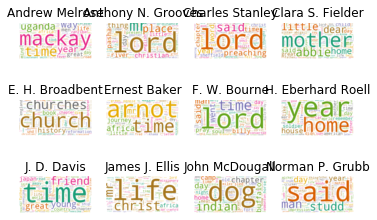

In [21]:
#create subplots for each author

for index, author in enumerate(dtm_data_pkl.columns):
    wc.generate(df.Book[author])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(authors[index])
    plt.savefig('Wc_missionary_trends2.png')
    
plt.show() 

In [22]:
#Find the number of unique words used by each author
unique_list = []
for author in dtm_data_pkl.columns:
    uniques = dtm_data_pkl[author].nonzero()[0].size
    unique_list.append(uniques)
    
#create a new dataframe that contains the uique word count
data_words = pd.DataFrame(list(zip(authors, unique_list)), columns=['Author', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  after removing the cwd from sys.path.


,Author,unique_words
2,Charles Stanley,1071
3,Clara S. Fielder,1111
6,F. W. Bourne,1176
11,Norman P. Grubb,1204
12,Robert Gribble,1210
8,J. D. Davis,1236
1,Anthony N. Grooves,1298
0,Andrew Melrose,1317
5,Ernest Baker,1378
9,James J. Ellis,1408


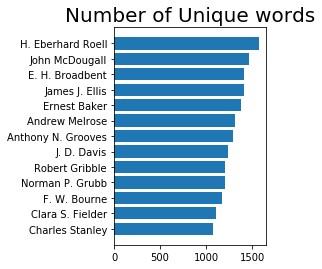

In [23]:
#plot unique words
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Author)
plt.title('Number of Unique words', fontsize= 20)
plt.savefig('Unique_words_mission_texts2.png')
plt.show()

In [24]:
#Carry out sentiment analysis
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['Book'].apply(pol)
df['subjectivity'] = df['Book'].apply(sub)
df

,Author,Book,polarity,subjectivity
0,Andrew Melrose,alexander mackay missionary hero uganda author...,0.104576,0.474789
1,Anthony N. Grooves,journal residence bagdad years mr anthony n gr...,0.106560,0.440179
2,Charles Stanley,printed hong kong empire printing company glou...,0.136433,0.461267
3,Clara S. Fielder,sister abigail abigail townsend luffe clara fe...,0.216765,0.523747
4,E. H. Broadbent,pilgrim church account continuance succeeding ...,0.131950,0.355943
5,Ernest Baker,life explorations frederick stanley arnot fred...,0.124822,0.425549
6,F. W. Bourne,king’s son memoir billy bray king’s son memior...,0.138482,0.500428
7,H. Eberhard Roell,dedicated memory general george blanchard whos...,0.067086,0.404787
8,J. D. Davis,sketch life rev joseph hardy neesima president...,0.127361,0.434786
9,James J. Ellis,dan crawford luanza missionary pioneers carrie...,0.207881,0.519064


In [25]:
#As expected all sentiments are positive

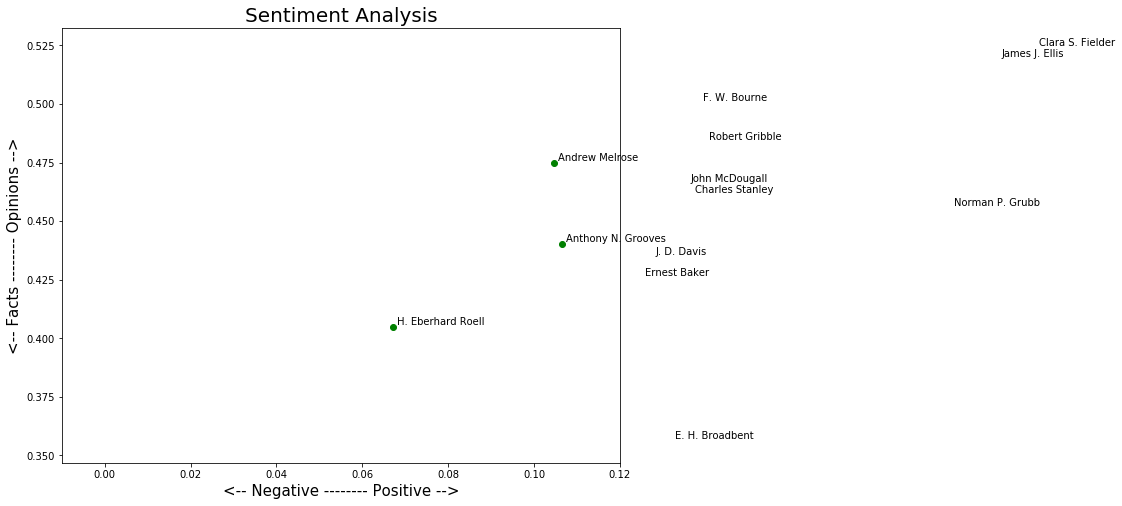

In [26]:
#plottitng the results
plt.rcParams['figure.figsize'] = [10, 8]
for index, author in enumerate(df.index):
    x = df.polarity.loc[author]
    y = df.subjectivity.loc[author]
    plt.scatter(x, y, color = 'green')
    plt.text(x+.001, y+.001, df['Author'][index], fontsize = 10)
    plt.xlim(-.01, .12)
    
plt.title('Sentiment Analysis', fontsize= 20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize = 15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize = 15)
plt.savefig('Sentiment_analysis_mission_text2.png')
plt.show()